In [569]:
import pandas as pd
import numpy as np
import matplotlib as mt
import sklearn as sk
import seaborn as sb

In [570]:
Data=pd.read_csv('car_data.csv', sep=',' )

### Eliminando duplicados y confirmando la posible existencia de valores NA

In [571]:
Data.head()
Data.isna().sum()
Data.duplicated().sum()

2

In [572]:
Data=Data.drop_duplicates()

### Estadistica descriptiva. Se aprecia gran presencia de outlier en las variables Selling_Price, Present_Price y Driven_Kms, debido a la grqn distancia entre los valores maximos con respecto al cuartil 3.

In [573]:
Data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.566332,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [574]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Driven_kms     299 non-null    int64  
 5   Fuel_Type      299 non-null    object 
 6   Selling_type   299 non-null    object 
 7   Transmission   299 non-null    object 
 8   Owner          299 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 23.4+ KB


In [577]:
Data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,1970-01-01 00:00:00.000002014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,1970-01-01 00:00:00.000002013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,1970-01-01 00:00:00.000002017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,1970-01-01 00:00:00.000002011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,1970-01-01 00:00:00.000002014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### Convirtiendo a dummies las variables fuel_type, selling_type y transmission.

In [578]:
dummies_Fuel = pd.get_dummies(Data['Fuel_Type'], drop_first = True) 
Data = pd.concat([Data, dummies_Fuel], axis = 1) 
Data = Data.drop(columns=['Fuel_Type'])

In [579]:
dummies_Selling = pd.get_dummies(Data['Selling_type'], drop_first = True) 
Data = pd.concat([Data, dummies_Selling], axis = 1) 
Data = Data.drop(columns=['Selling_type'])

In [580]:
dummies_Trans = pd.get_dummies(Data['Transmission'], drop_first = True) 
Data = pd.concat([Data, dummies_Trans], axis = 1) 
Data = Data.drop(columns=['Transmission'])

### Visualizando los outlier de las variables selling_Price, present_price y driven _kms

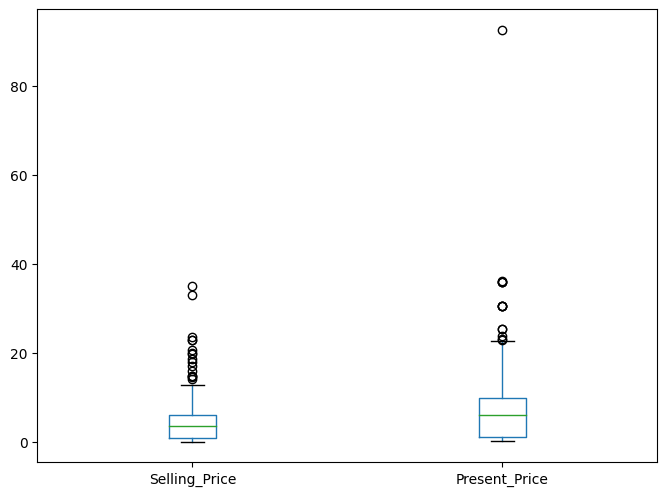

In [582]:
Data.boxplot(column=['Selling_Price', 'Present_Price'], figsize=(8,6), grid=False)

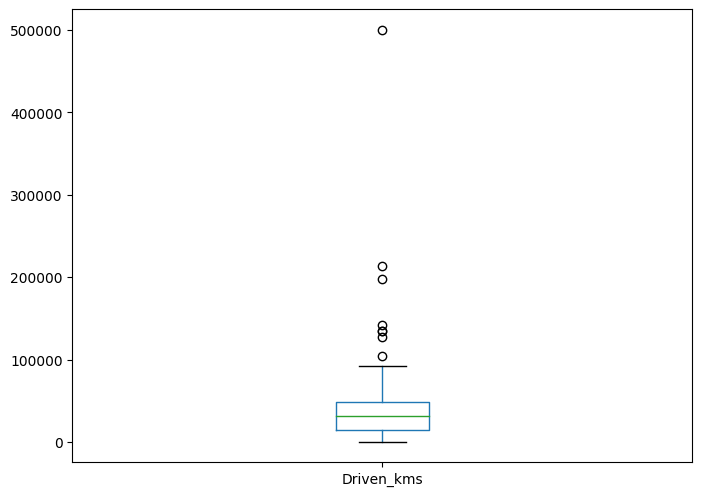

In [583]:
Data.boxplot(column=['Driven_kms'], figsize=(8,6), grid=False)

### Calculando los percentiles 10 y 90 de las variables con presencia de outlier, con la finalidad de corregir estos valores atipicos en funcion de sus percentiles.

In [584]:
P10_Selling=Data['Selling_Price'].quantile(0.10) 
P90_Selling=Data['Selling_Price'].quantile(0.90) 
P10_Selling, P90_Selling

(0.4, 9.299999999999997)

In [585]:
Data[Data['Selling_Price']>9.2999]=9.2999

In [586]:
P10_Driven=Data['Driven_kms'].quantile(0.10) 
P90_Driven=Data['Driven_kms'].quantile(0.90) 
P10_Driven, P90_Driven

(401.85998000000035, 61238.6)

In [587]:
Data[Data['Driven_kms']>65199.99]=65199.99

In [588]:
P10_Present=Data['Present_Price'].quantile(0.10) 
P90_Present=Data['Present_Price'].quantile(0.90) 
P10_Present, P90_Present

(0.728, 14.907999999999948)

In [589]:
Data[Data['Present_Price']>14.9079]=14.9079

In [591]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 300
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    object 
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Driven_kms     299 non-null    float64
 5   Owner          299 non-null    float64
 6   Diesel         299 non-null    float64
 7   Petrol         299 non-null    float64
 8   Individual     299 non-null    float64
 9   Manual         299 non-null    float64
dtypes: float64(8), object(2)
memory usage: 25.7+ KB


In [592]:
Data[['Individual', 'Diesel', 'Manual', 'Petrol', 'Owner']]=Data[['Individual', 'Diesel', 'Manual', 'Petrol', 'Owner']].astype('object')

### Calculando los VIF de las variables explicativas, de tal manera de determinar si hay presencia de multicolinealidad

In [593]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = Data[['Driven_kms', 'Present_Price']]

In [594]:
vif_Data = pd.DataFrame()
vif_Data["factores"] = X.columns
  
# calculando VIF
vif_Data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_Data)

        factores       VIF
0     Driven_kms  1.451316
1  Present_Price  1.451316


In [595]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression


### Seleccionando variables para construir el modelo de regresion

In [597]:
X = Data.drop(['Car_Name','Selling_Price', 'Year', 'Diesel', 'Owner', 'Individual'],axis=1)
y=Data['Selling_Price']

In [598]:
from sklearn.model_selection import train_test_split

In [599]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 100)

In [600]:
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape )

(224, 4) (75, 4) (224,) (75,)


In [601]:
lm = LinearRegression()

In [602]:
lm.fit(X_train, y_train)

LinearRegression()

In [604]:
pred_test = lm.predict(X_test)

In [605]:
pred_train = lm.predict(X_train)

In [606]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

### Calculando las metricas del modelo para determinar que tan bien se ajusta el modelo y que tanto explican las variables explicativas a la variable Selling_Price

In [607]:
print('test data acc:',r2_score(y_test, pred_test))
print('train data acc:',r2_score(y_train, pred_train))

test data acc: 0.9579759398003145
train data acc: 0.9718810099986143


In [608]:
print('test data acc:',mean_absolute_error(y_test, pred_test))
print('train data acc:',mean_absolute_error(y_train, pred_train))

test data acc: 0.6296704542497955
train data acc: 0.4827252230510543


In [609]:
print('test data acc:',mean_squared_error(y_test, pred_test))
print('train data acc:',mean_squared_error(y_train, pred_train))

test data acc: 0.8534841826077635
train data acc: 0.5472563311055175


In [610]:
import matplotlib.pyplot as plt

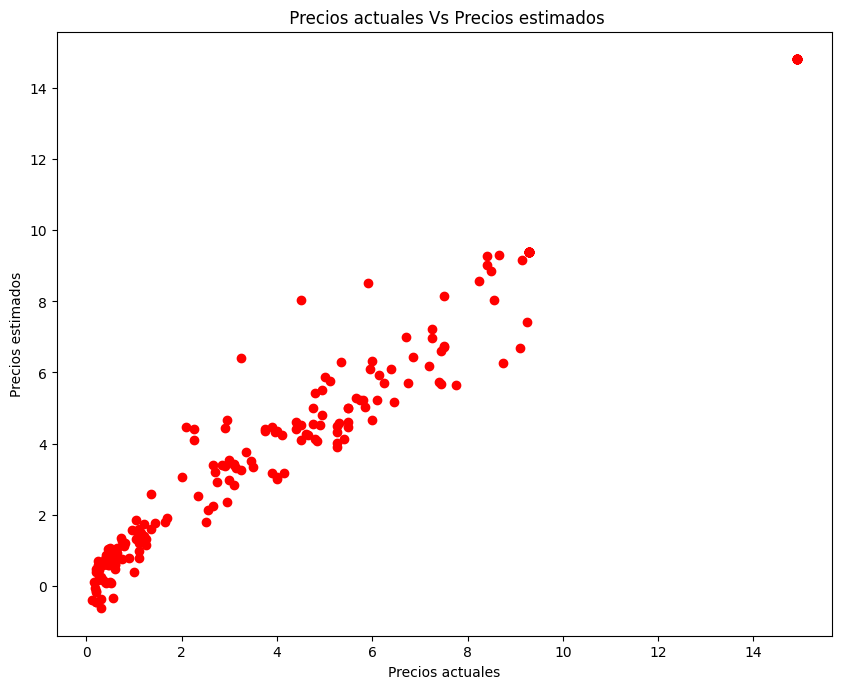

In [611]:
plt.scatter(y_train, pred_train, c='red')
plt.xlabel("Precios actuales")
plt.ylabel("Precios estimados")
plt.title(" Precios actuales Vs Precios estimados")   
plt.show() 

In [619]:
lm.fit(X_train, y_train)
r_sq=lm.score(X_train, y_train)
print("coeficiente de determinacion:{}".format(r_sq))
print("interceptor:{}".format(lm.intercept_)) 
print("inclinacion:{}".format(lm.coef_))

coeficiente de determinacion:0.9718810099986143
interceptor:0.4111530101585634
inclinacion:[ 6.83431113e-01 -2.80007153e-05 -6.92799707e-02  3.52298987e-01]


In [620]:
prediccion=lm.predict(X_test)
prediccion

array([ 5.46899255,  0.68090261,  9.39878216,  0.05941161,  9.39878216,
        0.85627255,  0.98074923,  4.19413773,  2.14651706,  3.94421596,
        0.88245435,  5.71175796,  3.26308949, 14.81847745,  0.58741227,
        4.98754666,  8.50637271,  6.11039873,  4.82009856, 14.81847745,
        3.77990776,  6.10759866,  1.09068183,  4.45200858,  9.39878216,
        0.11869829,  0.08124148,  9.39878216,  1.2228036 ,  1.10741592,
        6.04640754,  4.49816478,  6.93364294, 14.81847745,  6.69838575,
        0.67075094,  3.53739985,  2.13840169,  1.71036465,  2.84759008,
       14.81847745,  6.13378158, 14.81847745,  1.30703065,  0.67095055,
        4.23557491, 14.81847745,  3.0947425 ,  1.04491191,  5.41223632,
        4.25326604,  8.86527845,  6.07935405,  2.11545055,  5.94132524,
        1.70628824,  3.8001092 ,  2.69370704,  0.20203696,  3.95666299,
        1.39569115,  4.53611756, 14.81847745, 14.81847745,  0.96475846,
        5.8156694 ,  1.90868899,  6.64353855,  4.87949179,  2.10

### Un coeficiente de determinacion del 97% es casi perfecto. Esto indica que Present_Price, Driven_kms, Petrol y Manual que son las variables explicativas, explican en 97% el precio de venta de los carros usados, lo que indica un excelente ajuste del modelo.